### TP 5.4 Diffusion thermique, 
**Audfray et al, Informatique, Dunod, 2017, p. 218**

<br>

**Résolution en une dimension par la méthode des éléments finis; schéma explicite**

<br>

équation de diffusion thermique 1D:

$$ \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2} \qquad (E_0)$$

condition initiale:

$$ \forall x, T(x, 0) = 300 + 100x/L  \qquad (C_1)$$

condition aux limites:

$$ \forall t, T(0, t) = T(L, t) = 300  \qquad  (C_2) $$

valeurs de la température initiale: dans une liste $T^0$ de longueur $N$: $T^0_j$ avec
$j$ variant de 0 à N-1; cad N points sur le fil pour la discrétisation.


valeurs de la température à l'instant $t = n \Delta t$: dans une liste $T^n$ de longueur $N$: $T_j^n$, 
$j$ variant de 0 à N-1.



#### question 0. 

Fonction `PasEspace(L, N)` qui renvoie le pas d'espace $\Delta x$
en fonction de la longueur $L$ sur laquelle on résout le problème
et du nombre $N$ de points souhaités.


In [4]:
def PasEspace(L, N):
    return L/(N-1)

#### question 1.

Montrer que  $\frac{\partial T}{\partial t} \approx \frac{ T_j^{n+1} - T_j^n }{ \Delta t  } $
et que
$\frac{\partial^2 T}{\partial x^2} \approx \frac{ T_{j+1}^{n} - 2T_j^n + T_{j-1}^n }{ \Delta x^2  } $


#### réponse

Par définition, 
$\frac{\partial T}{\partial t} (x, t) = \lim_{h \to 0} \frac{T(x, t+h) - T(x, t)}{h}$.
Avec l'approximation des différences finies, 
$\frac{\partial T}{\partial t} (x, t) \approx \frac{T(x, t + \Delta t) - T(x, t)}{\Delta t}$.
Et donc avec les notations de l'exercice, 
$\frac{\partial T}{\partial t} \approx \frac{ T_j^{n+1} - T_j^n }{ \Delta t  } $.

On a aussi:
$\frac{\partial T}{\partial x} (x, t) = \lim_{h \to 0} \frac{T(x+h, t) - T(x, t)}{h}$.
Et de même
$\frac{\partial T}{\partial x} (x, t) \approx \frac{T(x + \Delta x, t) - T(x, t)}{\Delta x}$
et avec les notations de l'exercice
$\frac{\partial T}{\partial x} \approx \frac{T_{j+1}^n - T_j^n}{\Delta x}$


On dérive cette expression pour obtenir une approximation de $\frac{\partial^2 T}{\partial x^2}$:


$\frac{\partial}{\partial x} \left[ \frac{T(x + \Delta x, t) - T(x, t)}{\Delta x} \right] 
= \frac{1}{\Delta x} \left[\frac{\partial}{\partial x}(  T(x + \Delta x, t) ) - \frac{\partial}{\partial x}(T(x, t))\right] $

$\approx
\frac{1}{\Delta x} \left[\frac{T(x + 2 \Delta x,t) - T(x + \Delta x, t)}{\Delta x} - \frac{T(x+ \Delta x,t) - T(x , t)}{\Delta x} \right]$

$\approx
 \frac{1}{\Delta x} \left[\frac{T(x +  \Delta x,t) - T(x , t)}{\Delta x} - \frac{T(x ,t) - T(x - \Delta x , t)}{\Delta x} \right]$
 
$\approx
\frac{1}{\Delta x} \left [ \frac{T(x + \Delta x,t) - 2 T(x , t) + T(x - \Delta x , t)}{\Delta x} \right ]$

$\approx
\frac{1}{\Delta x ^2} 
\left[
T(x +  \Delta x, t) - 2 T(x, t) + T(x - \Delta x, t)
\right]$



c'est-à-dire avec les notations de l'énoncé:

$$
\frac{\partial^2 T}{\partial x^2} 
\approx
\frac{T_{j+1}^n - 2 T_j^n + T_{j-1}^n}{\Delta x ^2} 
$$


#### question 2.

En déduire que, pour $j \neq 0$ et $j \neq n-1$,
$T_j^{n+1} = T_j^n + c (T_{j-1}^n - 2T_j^n + T_{j+1}^n)$ avec $c = \frac{\Delta t D}{\Delta x^2}$



#### réponse

On utilise l'équation de diffusion thermique: $ \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2}$ $(E_0)$ et la réponse à la question 1: 
$\frac{\partial T}{\partial t} \approx \frac{ T_j^{n+1} - T_j^n }{ \Delta t  } $, et
$
\frac{\partial^2 T}{\partial x^2} 
\approx
\frac{T_{j+1}^n - 2 T_j^n + T_{j-1}^n}{\Delta x ^2} 
$



#### question 3.

Comment s'écrit la relation de récurrence précédente lorsque $j = 0$ et lorque $j = N-1$ ?


#### réponse


$T_0^{n} = T_{N-1}^n = 300$








#### question 4

Ecrire une fonction `initialisation(L ,N)` qui renvoie la liste des valeurs de $T_j^0$ 
respectant la condition initiale $(C_1)$ de l'équation aux dérivées partielles $(E_O)$

$$ \forall x, T(x, 0) = 300 + 100x/L  \qquad (C_1)$$


In [3]:
def initialisation(L, N):
    T = []
    delta = PasEspace(L,N)
    for j in range(N):
        T.append(300+100*j*delta/L)
    return T


#### question 5

Ecrire une fonction `transition(T, c, N, Tbord=300)` 

- $c = \frac{\Delta t D}{\Delta x^2}$
- $T$ : `T[n]` contient les valeurs de $T^n$
Renvoie:
- une liste contenant $T^{n+1}$

#### réponse

On utlise les résultats de la [question 2](#question-2.) et de la [question 3](#question-3.).

In [1]:
def transition(T, c, N, Tbord=300):
    T_suivant = []
    T_suivant.append(Tbord)
    for  j in range(1,N-1):
        T_suivant.append(T[j] + c*(T[j-1] -2*T[j] + T[j+1]))
        
    T_suivant.append(Tbord)
    return T_suivant

#### question 6.

Représentation graphique du profil en température toutes les 6 secondes avec: 

$\Delta t = 0.01s; N = 101; L = 0.5 m$ et $D = 1.2 \times 10^{-4} m^2.s^{-1}$

Calcul jusqu'à un temps de 10 minutes.

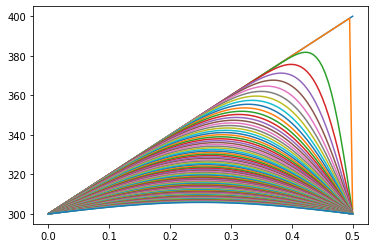

In [5]:
import matplotlib.pyplot as plt
import numpy as np

delta_t = 0.01  # en secondes
N = 101
L = 0.5 # en mètres
D = 1.02e-4

delta_x = PasEspace(L, N)
c = delta_t * D / (delta_x**2)

duree_experience = 600 # en secondes
nb_iterations = int(np.ceil( duree_experience / delta_t) )
delta_affichage_sec = 6 # en secondes
delta_affichage_it = int(np.ceil( delta_affichage_sec / delta_t) ) # en nombre d'itérations

# abscisses
X = [j*delta_x for j in range(N)]


fig = plt.figure("TP 5.4 - Diffusion thermique")

T = initialisation(L, N)
plt.plot(X, T)

for i in range(nb_iterations):
    T = transition(T,c,N,Tbord = 300)
    if i % delta_affichage_it == 0:
        plt.plot(X,T)
    


